In [24]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [25]:
ds_path = os.getcwd().removesuffix('notebook\\eda')+'datasets\\'
artifacts_path = os.getcwd().removesuffix('notebook\\eda')+'artifacts\\'
os.makedirs(artifacts_path, exist_ok=True)
we_path = ds_path + 'we.csv'
age_path = ds_path + 'age.csv'
fr_path = ds_path + 'fr.csv'
gdp_path = ds_path + 'gdp.csv'

In [26]:
we, fr, gdp, age = pd.read_csv(we_path), pd.read_csv(fr_path), pd.read_csv(gdp_path), pd.read_csv(age_path)

In [27]:
we.rename(columns={'Combined - average years of education for 15-64 years female youth and adults':'we_avg_yr'},inplace=True)
fr.rename(columns={'Fertility rate - Sex: all - Age: all - Variant: estimates':'fr'},inplace=True)
gdp.rename(columns={'GDP, PPP (constant 2017 international $)':'gdp_ppp'},inplace=True)
age.rename(columns={'Median age - Sex: all - Age: all - Variant: estimates':'median_age'},inplace=True)

### Year Range

In [28]:
year_min, year_max = max(we['Year'].min(),fr['Year'].min(),gdp['Year'].min(),age['Year'].min()), min(we['Year'].max(),fr['Year'].max(),gdp['Year'].max(),age['Year'].max())

In [29]:
year_min, year_max

(np.int64(1990), np.int64(2022))

In [30]:
countries = ['United States', 'India', 'Germany']
all_years = { i for i in range(year_min, year_max+1)}

### we Missing Years

In [31]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(we[we['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### FR Missing Years

In [32]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(fr[fr['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### GDP Missing Years

In [33]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(gdp[gdp['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### Filtering DFs wrt countries

In [34]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(age[age['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


In [35]:
filtered_we = we[we['Entity'].isin(countries) & we['Year'].isin(all_years)]
filtered_fr = fr[fr['Entity'].isin(countries) & fr['Year'].isin(all_years)]
filtered_gdp = gdp[gdp['Entity'].isin(countries) & gdp['Year'].isin(all_years)]
filtered_age = age[age['Entity'].isin(countries) & age['Year'].isin(all_years)]

In [36]:
filtered_we = filtered_we[['Entity','Year','we_avg_yr']]
filtered_fr = filtered_fr[['Entity','Year','fr']]
filtered_gdp = filtered_gdp[['Entity','Year','gdp_ppp']]
filtered_age = filtered_age[['Entity','Year','median_age']]

In [37]:
filtered_gdp['gdp_ppp']=filtered_gdp['gdp_ppp']/1_000_000_000

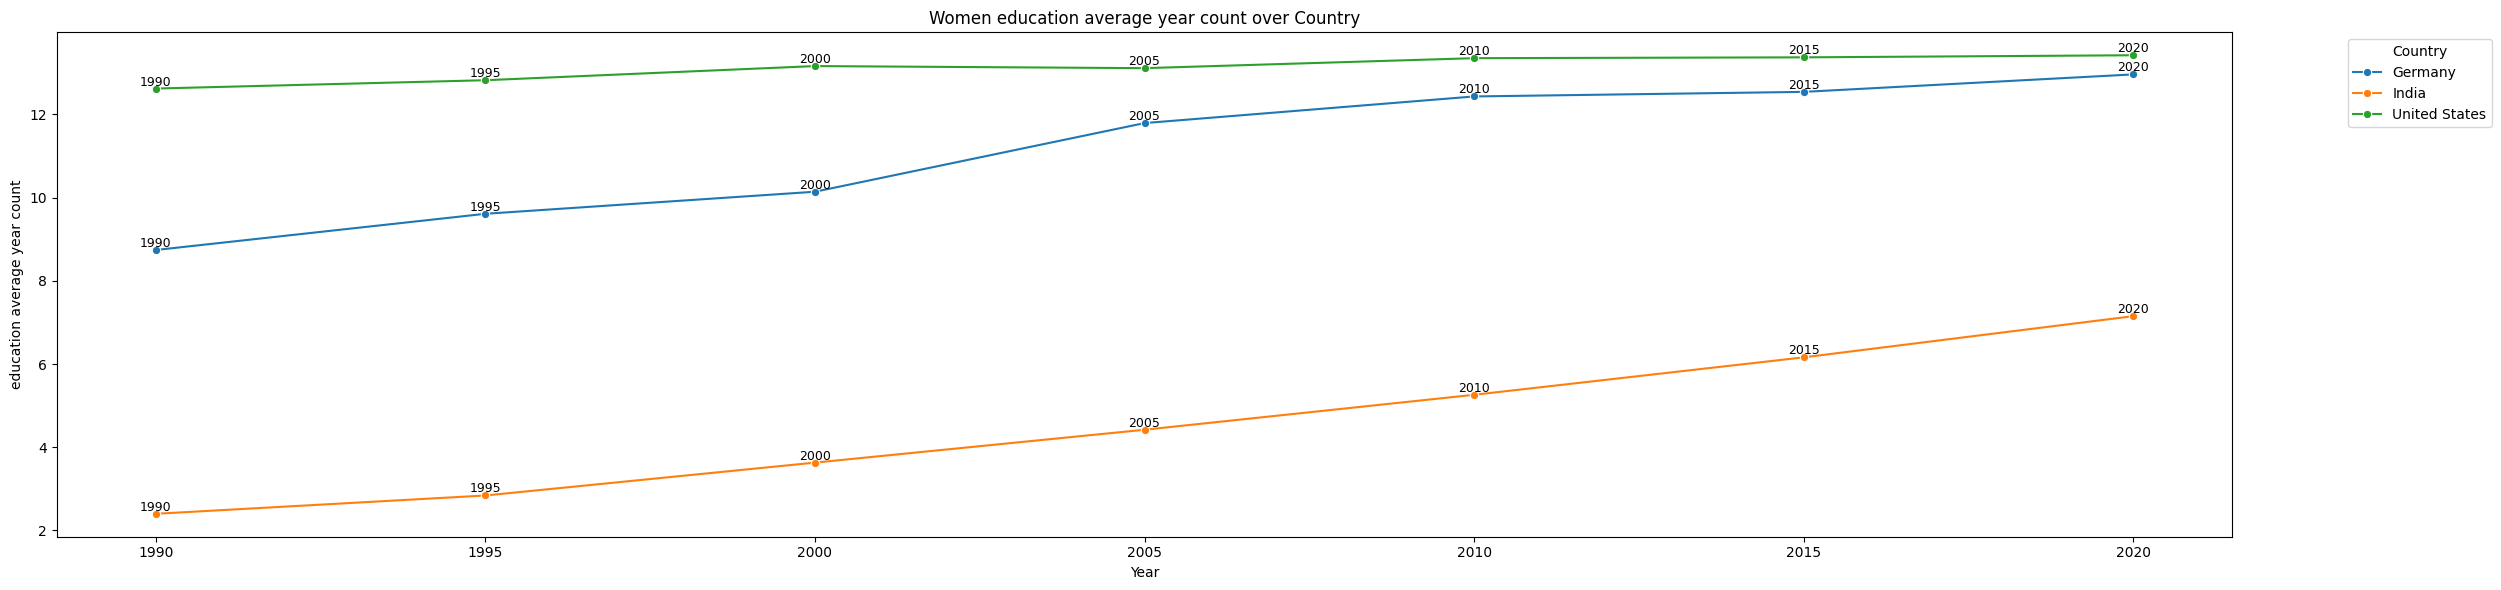

In [38]:
# Set palette
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(25, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_we, x='Year', y='we_avg_yr', hue='Entity', marker='o')

# Title and labels
plt.title('Women education average year count over Country')
plt.xlabel('Year')
plt.ylabel('education average year count')

# Add labels over the points
for line in plt.gca().get_lines():  # Loop over each line in the plot
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for i in range(len(x_data)):
        plt.text(x_data[i], y_data[i], str(int(x_data[i])), ha='center', va='bottom', fontsize=9, color='black')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


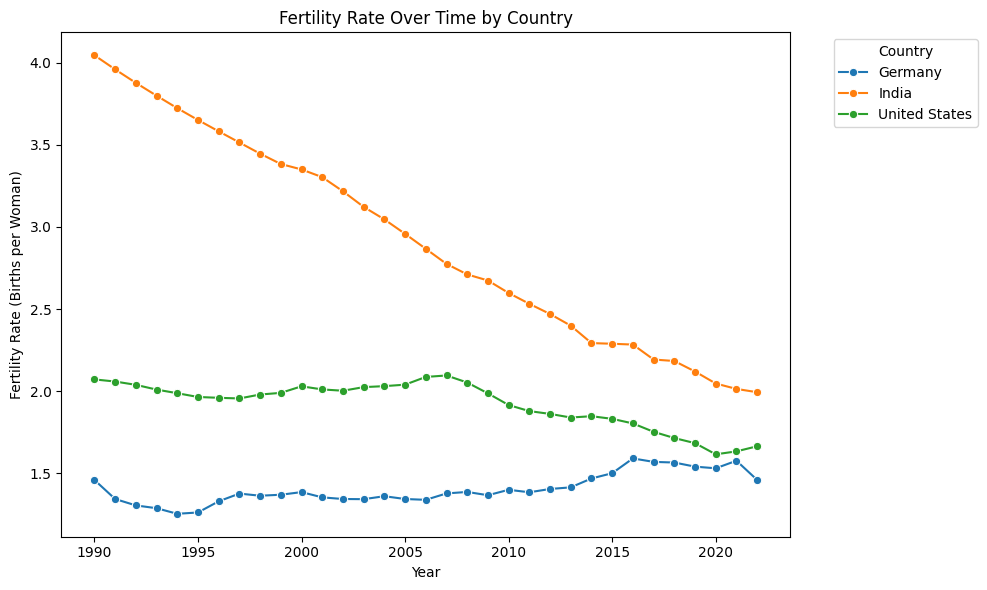

In [39]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_fr, x='Year', y='fr', hue='Entity', marker='o')

# Title and labels
plt.title('Fertility Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Fertility Rate (Births per Woman)')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

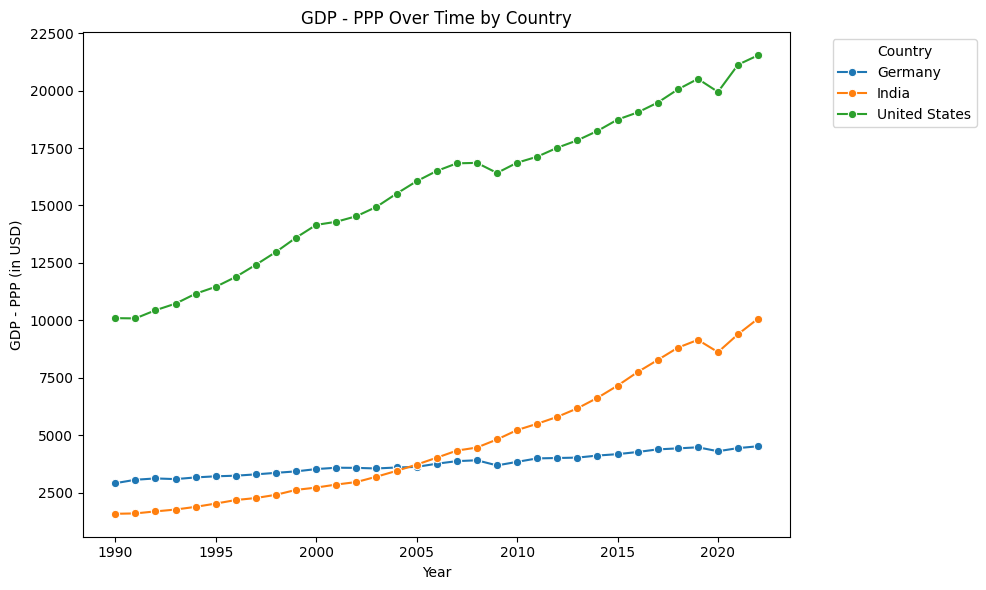

In [40]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_gdp, x='Year', y='gdp_ppp', hue='Entity', marker='o')

# Title and labels
plt.title('GDP - PPP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP - PPP (in USD)')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

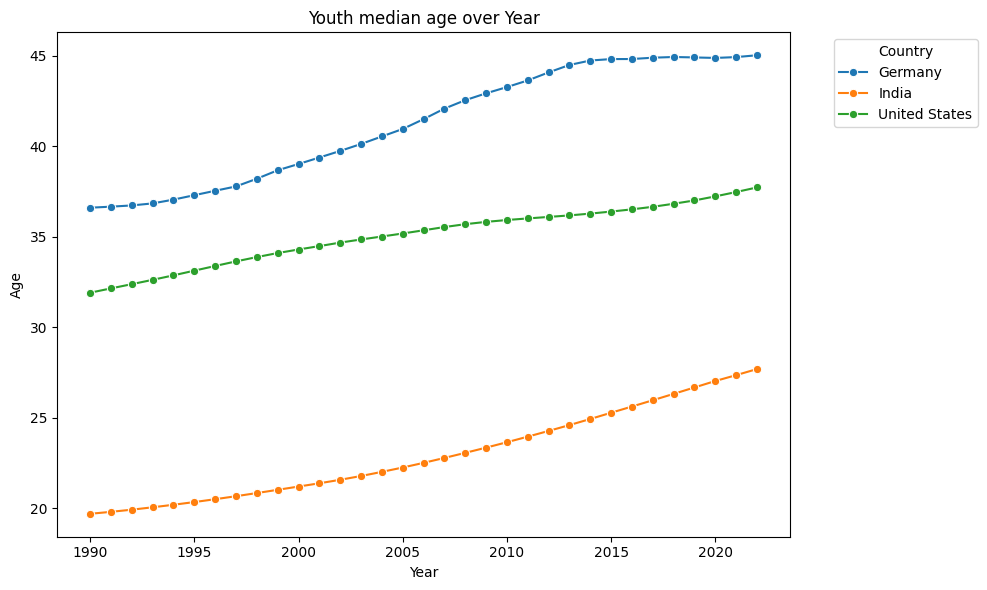

In [41]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_age, x='Year', y='median_age', hue='Entity', marker='o')

# Title and labels
plt.title('Youth median age over Year')
plt.xlabel('Year')
plt.ylabel('Age')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [43]:
tmp_df1 = pd.merge(filtered_we, filtered_fr, how='outer', on=['Entity','Year'])
tmp_df2 = pd.merge(tmp_df1, filtered_gdp, how='outer', on=['Entity', 'Year'])
tmp_df3 = pd.merge(tmp_df2, filtered_age, how='outer', on=['Entity', 'Year'])
tmp_df4 = pd.merge(tmp_df3, filtered_we, how='outer', on=['Entity', 'Year'])

In [44]:
merged_df = tmp_df4.filter(items=['Entity','Year','we_avg_yr','fr','median_age','gdp_ppp'])

In [46]:
merged_df.to_csv(artifacts_path+'eco-1990-2022.csv',index=False)